# **End-to-End Cheminformatics Project: Presdicting the Solubility of Molecules using Pycaret** 

Nickolas Winters

**Notebook Overveiw**

In this Jupyter notebook, the libraray pycaret will be applied to the processed delaney dataset to creaste a regression model that can predict a compounds solubility based on key molecular descriptors.

**Acknowledgments**

This projected was inspired by and adapted from the <i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>: the prkect reproduces a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

### **1. Load Necessary Libraries**

In [20]:
# Reading in the data
import pandas as pd

# Model Building
from pycaret.regression import *

### **2. Load in the Data**

In [2]:
# read in the data and assign it to an obkject
dataset = pd.read_csv('delaney_solubility_with_descriptors.csv')

In [3]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### **3. Model Setup**

To begin the model building process first it is necessary to set up the structure of the model, i.e. what data is being used, what the target variable is, and what the training size is.

In [21]:
# specify what data is being used, the target variable, and the training size
model = setup(data = dataset, target = 'logS', train_size=0.8)

,Description,Value
0,Session id,384
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(915, 5)"
6,Transformed test set shape,"(229, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


### **4. Model comparison**

Before actually creating the model, pycaret will be employed to evaluate what kind of regression model yeilds the best metrics. The best model will then be used for model creation and analysis.

In [22]:
# compare models based on regression metrics
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5114,0.5100,0.7097,0.8888,0.2021,0.4379,0.0270
rf,Random Forest Regressor,0.5354,0.5481,0.7377,0.8804,0.2091,0.4884,0.0400
lightgbm,Light Gradient Boosting Machine,0.5544,0.5791,0.7566,0.8737,0.2119,0.4699,0.4190
gbr,Gradient Boosting Regressor,0.5928,0.6193,0.7843,0.8644,0.2229,0.5261,0.0190
ada,AdaBoost Regressor,0.7066,0.8104,0.8975,0.8234,0.2432,0.6780,0.0130
dt,Decision Tree Regressor,0.6511,0.8561,0.9168,0.8129,0.2486,0.5450,0.0040
br,Bayesian Ridge,0.7930,1.0581,1.0248,0.7686,0.2917,0.8933,0.0040
ridge,Ridge Regression,0.7925,1.0581,1.0248,0.7685,0.2918,0.8926,0.0030
lar,Least Angle Regression,0.7924,1.0581,1.0248,0.7685,0.2918,0.8925,0.0040
lr,Linear Regression,0.7924,1.0581,1.0248,0.7685,0.2918,0.8925,0.2670


ExtraTreesRegressor(n_jobs=-1, random_state=384)

### **5. Model Creation**

Now that the best model has been determined, the model will now be initialized.

In [7]:
# create and assign the regeression model
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4900,0.5627,0.7501,0.8531,0.1870,0.3007
1,0.5307,0.4856,0.6969,0.9058,0.1905,0.3963
2,0.5431,0.5869,0.7661,0.8461,0.2372,2.4233
3,0.5452,0.5241,0.7240,0.8831,0.1992,0.6793
4,0.4476,0.3830,0.6189,0.9217,0.1857,0.2563
5,0.6003,0.7436,0.8623,0.8624,0.2460,0.5157
6,0.4703,0.4293,0.6552,0.8945,0.1690,0.4132
7,0.5359,0.4974,0.7053,0.8901,0.2223,1.1359
8,0.4007,0.3090,0.5558,0.9309,0.1565,0.4774


### **6. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [9]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5848,0.6396,0.7997,0.8330,0.2283,0.3951
1,0.6026,0.5788,0.7608,0.8877,0.1987,0.5752
2,0.5614,0.5765,0.7593,0.8488,0.2319,2.2353
3,0.5492,0.4769,0.6906,0.8937,0.1999,0.4210
4,0.5336,0.4501,0.6709,0.9080,0.2070,0.3855
5,0.6276,0.7629,0.8735,0.8588,0.2575,0.6313
6,0.5843,0.5692,0.7545,0.8602,0.1946,0.3986
7,0.5936,0.5329,0.7300,0.8823,0.2294,1.2402
8,0.4957,0.3769,0.6139,0.9157,0.1953,0.8421


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
print(tuned_et)

ExtraTreesRegressor(n_jobs=-1, random_state=8596)


### **7. Model Analysis**

Now that the model has been created and fit to the data, it now time to analize it performance/

**Residuals Plot**

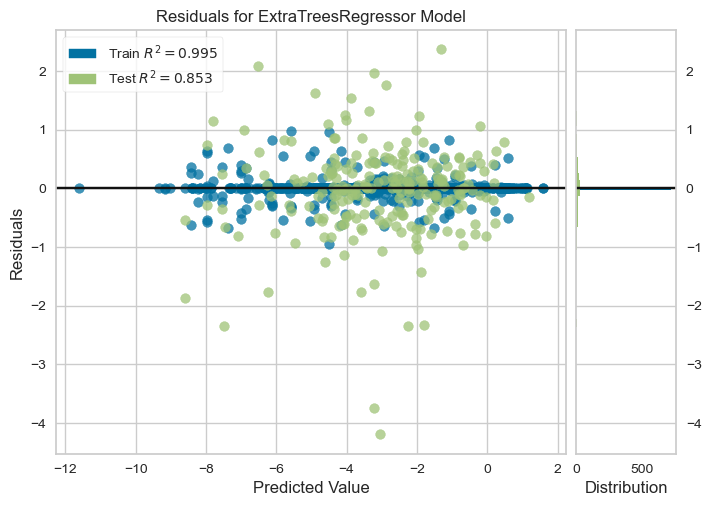

In [11]:
plot_model(et, 'residuals')

**Prediction Error Plot**

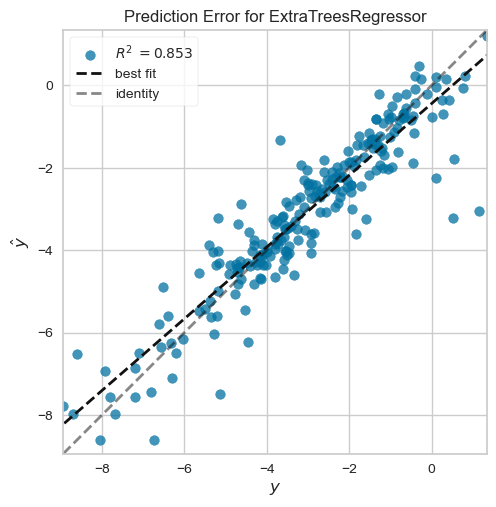

In [12]:
plot_model(et, 'error')

**Cooks Distance Plot**

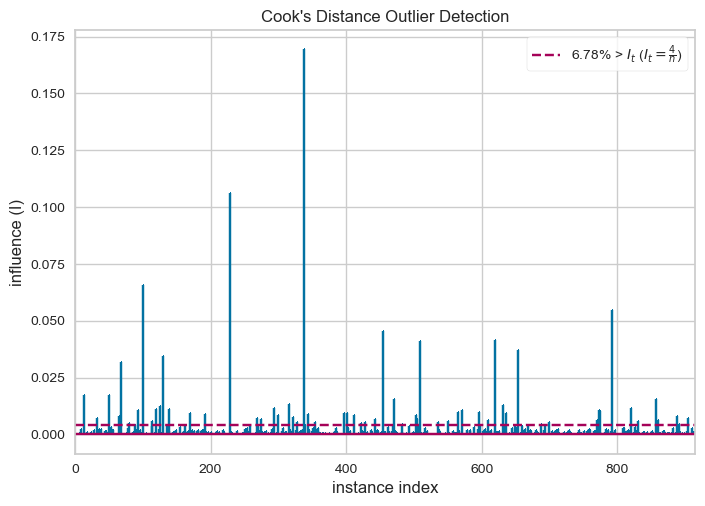

In [13]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

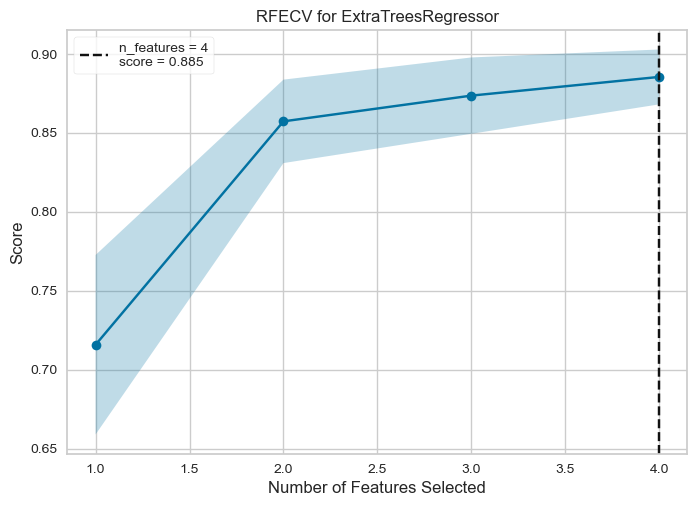

In [13]:
plot_model(et, 'rfe')

**Learning Curve**

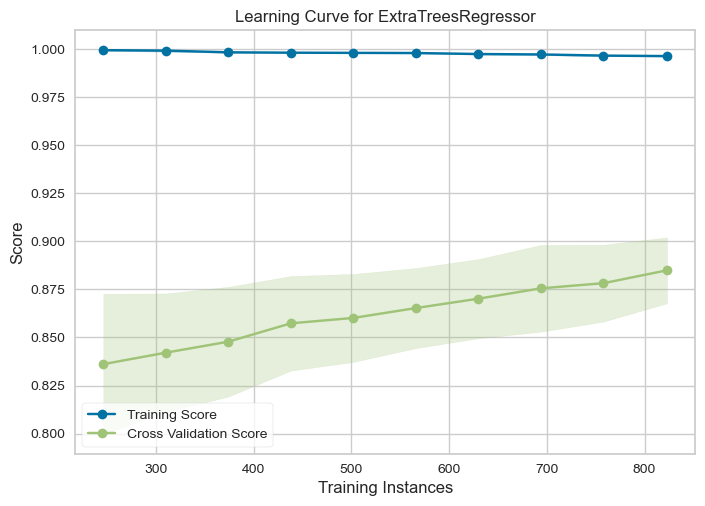

In [14]:
plot_model(et, 'learning')

**Validation Curve**

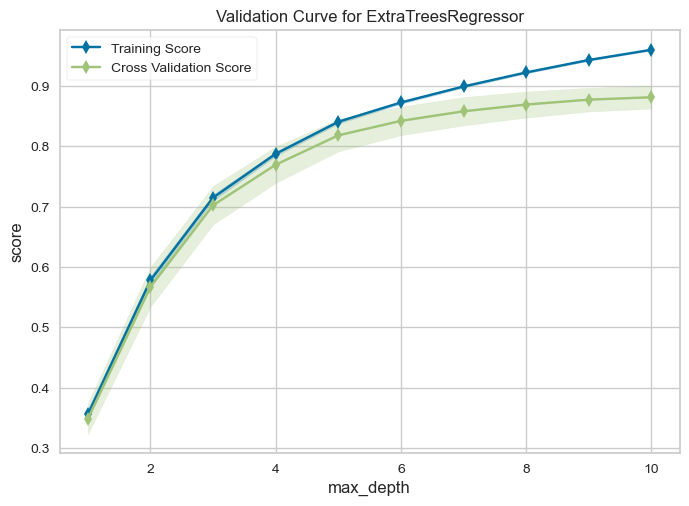

In [15]:
plot_model(et, 'vc')

**Manifold Learning**

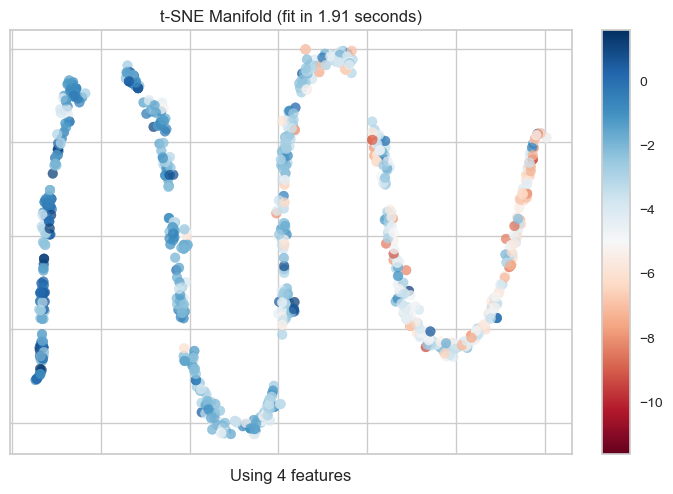

In [16]:
plot_model(et, 'manifold')

**Feature Importance**

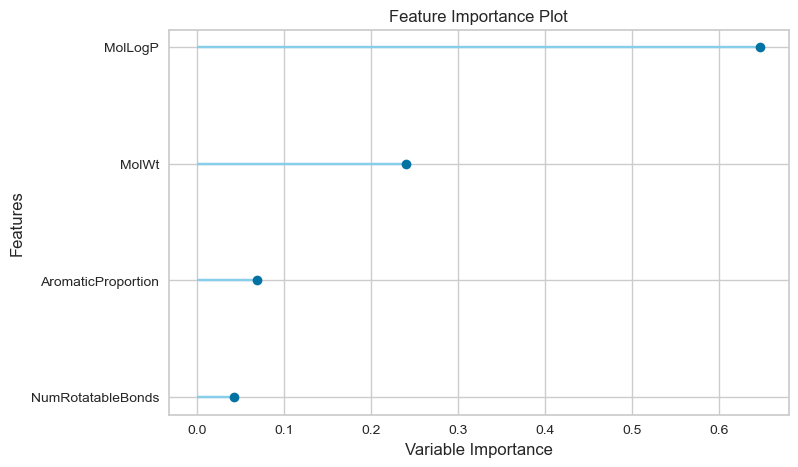

In [17]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [18]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


Here, the hyperparameter of the tuned model is displayed below.

#### **8. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values. SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

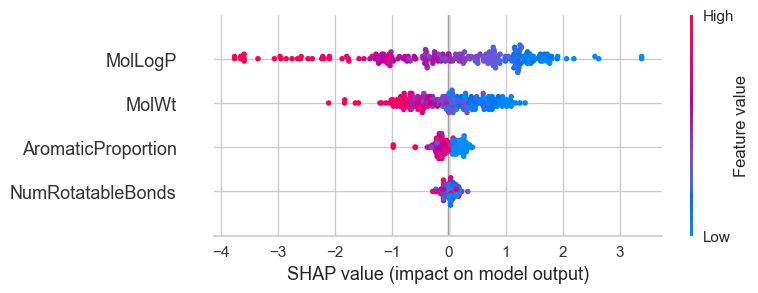

In [14]:
interpret_model(et)

**Correlation Plot**

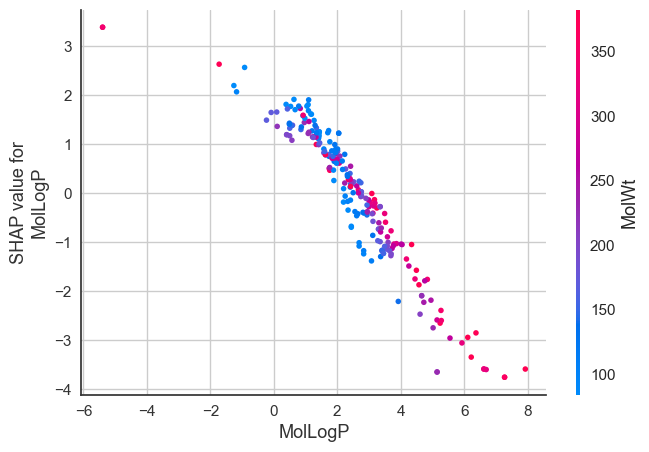

In [15]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [16]:
interpret_model(et, plot = 'reason', observation = 10)

### **9. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [17]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5216,0.6083,0.7799,0.8531,0.2103,0.4356


In [18]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
759,2.32180,138.210007,0.0,0.0,-1.060,-2.035310
1139,1.98820,287.342987,8.0,0.0,1.144,-3.053910
216,1.94750,116.204002,4.0,0.0,-1.550,-1.400000
993,0.91998,55.080002,0.0,0.0,0.280,-0.682000
790,5.27970,340.506989,1.0,0.0,-5.270,-6.039713


---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.